In [72]:
#1.Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.
import pandas as pd

# Завантажити датасет
file_path = "/content/museum_visitors.csv"
df = pd.read_csv(file_path)

In [73]:
#2.Вивести перші 5 рядків датасету.
print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [74]:
#3.Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).
# Розмір датасету
print("Розмір датасету:", df.shape)

# Типи даних
print("Типи даних:")
print(df.dtypes)

# Кількість пропусків
print("Кількість пропусків:")
print(df.isnull().sum())


Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [75]:
#4.Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).
# Пошук та видалення дублікатів
df = df.drop_duplicates()

# Розмір таблиці після видалення дублікатів
print("Розмір таблиці без дублікатів:", df.shape)


Розмір таблиці без дублікатів: (59, 5)


In [78]:
#5.Про які роки містить інформацію датасет.

df['Date'] = pd.to_datetime(df['Date'])

# Роки в датасеті
unique_years = df['Date'].dt.year.unique()
print("Роки в датасеті:", unique_years)

Роки в датасеті: [2014 2015 2016 2017 2018]


In [79]:
#6.Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).
df.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']


In [80]:
#7.Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
mean_visitors = df.mean()
print("Середня кількість відвідувачів:")
print(mean_visitors)


Середня кількість відвідувачів:
avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


<ipython-input-80-ed992905c822>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_visitors = df.mean()


In [81]:
#8.Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік
# Мінімальна кількість відвідувачів для кожного музею в 2018 році
min_visitors_2018 = df[df['date'].dt.year == 2018].min()
print("Мінімальна кількість відвідувачів в 2018 році:")
print(min_visitors_2018)

# Максимальна кількість відвідувачів для кожного музею в 2018 році
max_visitors_2018 = df[df['date'].dt.year == 2018].max()
print("Максимальна кількість відвідувачів в 2018 році:")
print(max_visitors_2018)


Мінімальна кількість відвідувачів в 2018 році:
date                                    2018-01-01 00:00:00
avila_adobe                                           14718
firehouse_museum                                       3306
chinese_american_museum                                2146
america_tropical_interpretive_center                   3180
dtype: object
Максимальна кількість відвідувачів в 2018 році:
date                                    2018-11-01 00:00:00
avila_adobe                                           25173
firehouse_museum                                       8013
chinese_american_museum                                4960
america_tropical_interpretive_center                   5837
dtype: object


In [85]:
#9.Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).
# Виділити дані за 2015 рік
data_2015 = df[df['date'].dt.year == 2015]

# Загальна кількість відвідувачів для кожного місяця
monthly_sum = data_2015.groupby(data_2015['date'].dt.month)[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum()

# Знайти місяць з найвищою і найнижчою кількістю відвідувачів
max_month = monthly_sum.idxmax().values[0]
min_month = monthly_sum.idxmin().values[0]

# Конвертувати номери місяців в назви місяців
import calendar
max_month_name = calendar.month_name[max_month]
min_month_name = calendar.month_name[min_month]

print("Місяць з найвищою кількістю відвідувачів:", max_month_name)
print("Місяць з найнижчою кількістю відвідувачів:", min_month_name)


Місяць з найвищою кількістю відвідувачів: July
Місяць з найнижчою кількістю відвідувачів: February


In [86]:
#10.Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року
# Виділити дані за літо (червень, липень, серпень) та зиму (грудень, січень, лютий)
summer_winter_2018 = df[(df['date'].dt.year == 2018) & ((df['date'].dt.month.isin([6, 7, 8])) | (df['date'].dt.month.isin([12, 1, 2])))]

# Кількість відвідувачів музею "Avila Adobe" у літо та зиму 2018 року
avila_adobe_summer = summer_winter_2018[summer_winter_2018['date'].dt.month.isin([6, 7, 8])]['avila_adobe'].sum()
avila_adobe_winter = summer_winter_2018[summer_winter_2018['date'].dt.month.isin([12, 1, 2])]['avila_adobe'].sum()

print("Кількість відвідувачів музею 'Avila Adobe' у літо 2018 року:", avila_adobe_summer)
print("Кількість відвідувачів музею 'Avila Adobe' у зиму 2018 року:", avila_adobe_winter)


Кількість відвідувачів музею 'Avila Adobe' у літо 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' у зиму 2018 року: 30983


In [87]:
#11.Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році
# Виділити дані за 2016 рік
data_2016 = df[df['date'].dt.year == 2016]

# Кореляція між кількістю відвідувачів і датами
correlation = data_2016.corr()
print("Кореляція між кількістю відвідувачів і датами у 2016 році:")
print(correlation)


Кореляція між кількістю відвідувачів і датами у 2016 році:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum     

<ipython-input-87-cc46704084ae>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_2016.corr()


<ipython-input-88-c1c1343f64b8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


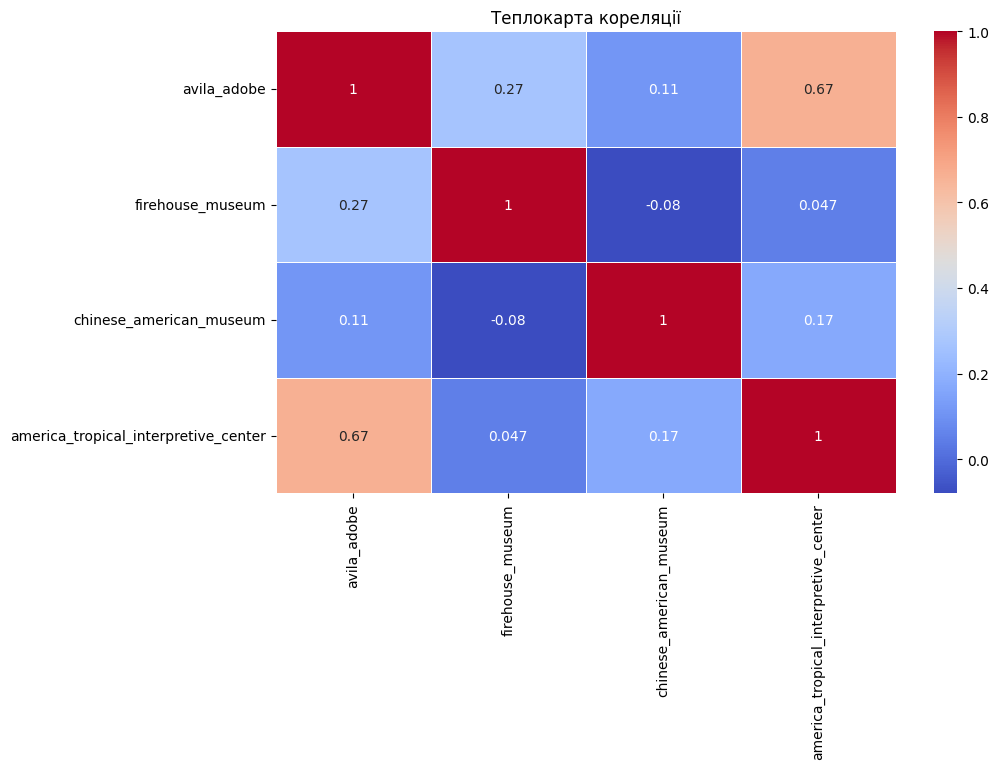

In [88]:
#12.Побудувати теплокарту кореляції для попереднього завдання.
import seaborn as sns
import matplotlib.pyplot as plt

# Матриця кореляції
correlation_matrix = df.corr()

# Побудувати теплокарту
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Теплокарта кореляції')
plt.show()


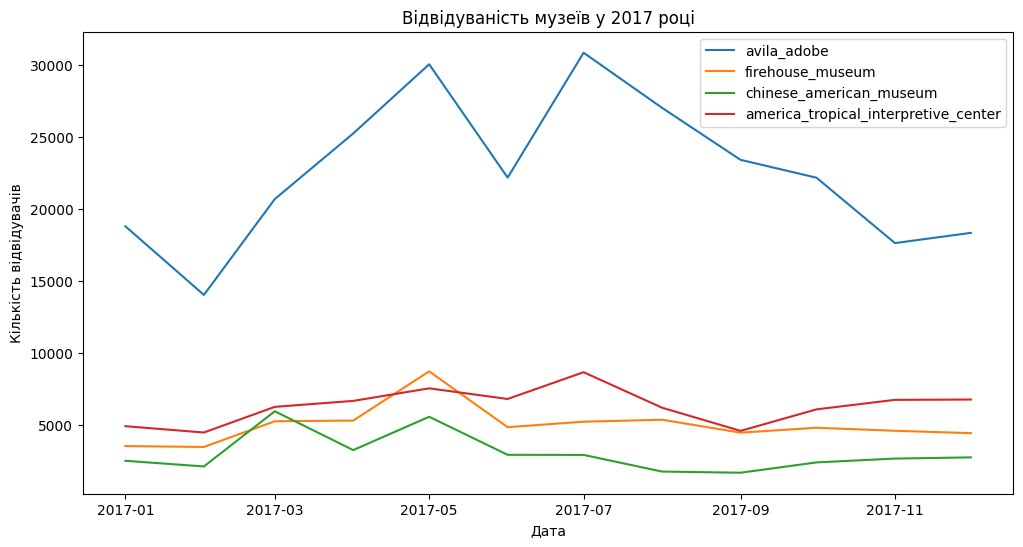

In [89]:
#13.Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.
# Виділити дані за 2017 рік
data_2017 = df[df['date'].dt.year == 2017]

# Побудувати графік ліній для кожного музею
plt.figure(figsize=(12, 6))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.plot(data_2017['date'], data_2017[museum], label=museum)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend()
plt.show()


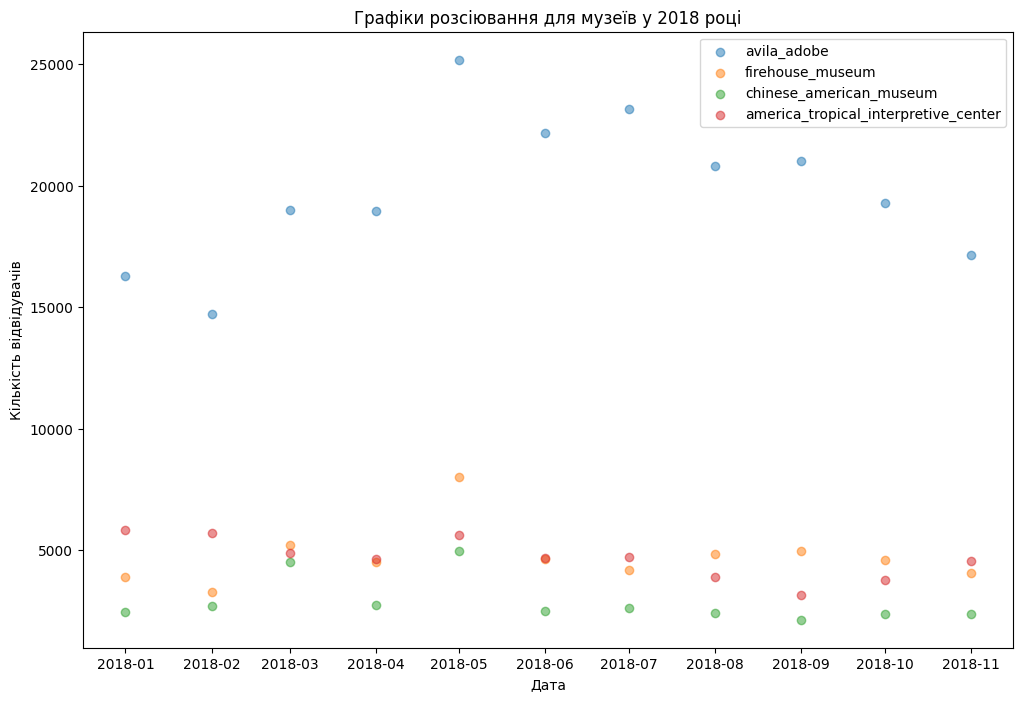

In [90]:
#14.Побудувати графіки розсіювання для кожного музею за 2018 рік
# Виділити дані за 2018 рік
data_2018 = df[df['date'].dt.year == 2018]

# Побудувати графіки розсіювання для кожного музею
plt.figure(figsize=(12, 8))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.scatter(data_2018['date'], data_2018[museum], label=museum, alpha=0.5)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Графіки розсіювання для музеїв у 2018 році')
plt.legend()
plt.show()


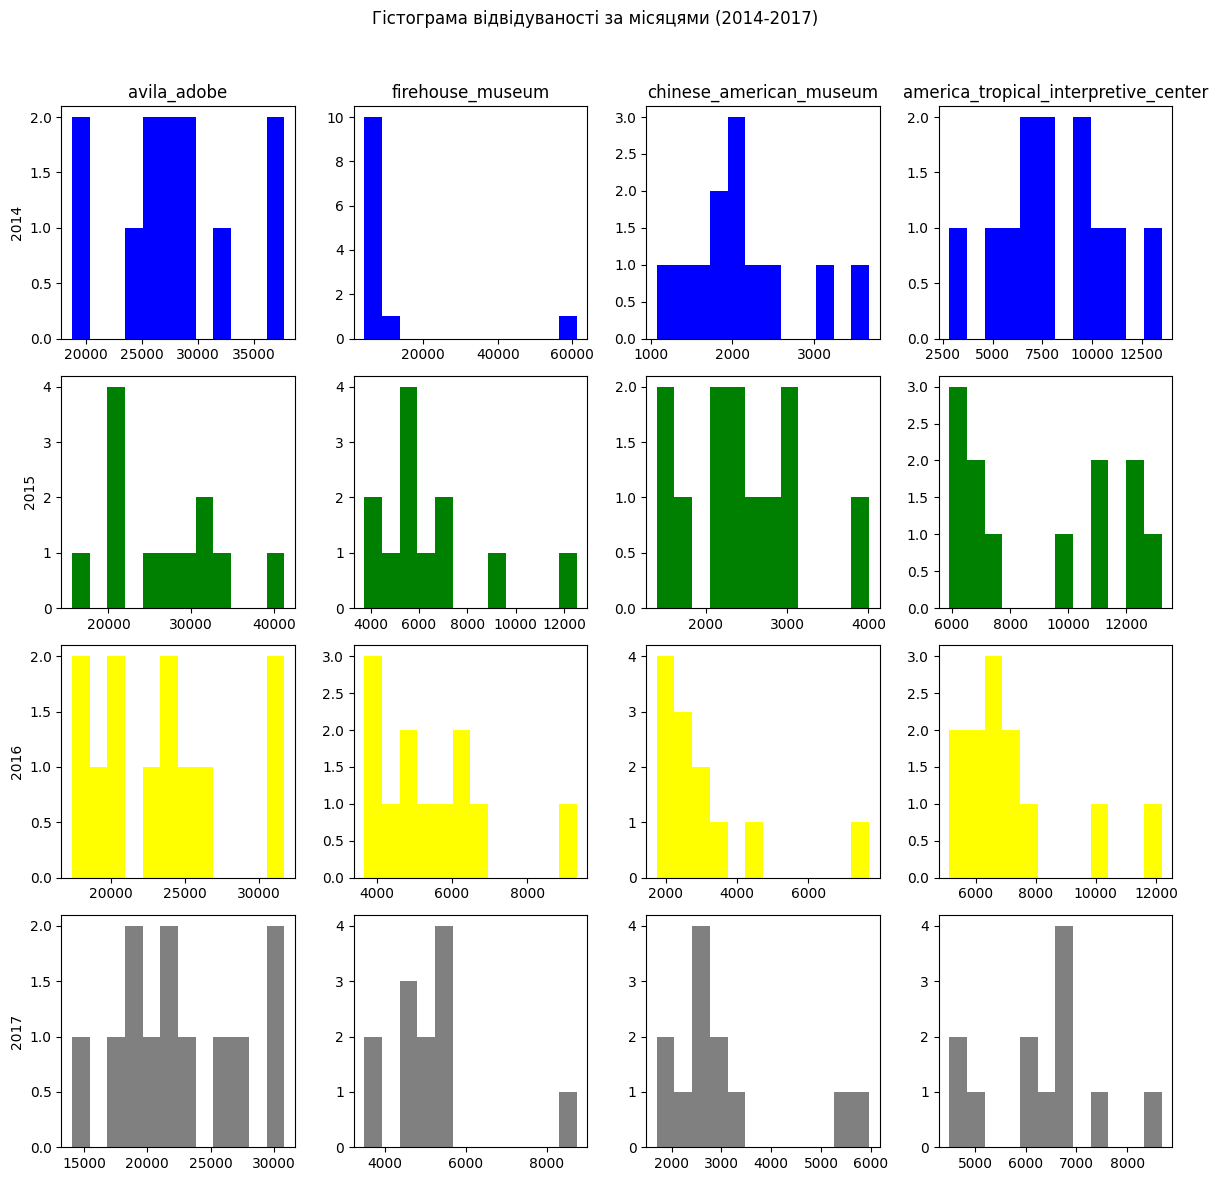

In [92]:
#15.Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.
# Виділити дані за кожен з років
data_2014 = df[df['date'].dt.year == 2014]
data_2015 = df[df['date'].dt.year == 2015]
data_2016 = df[df['date'].dt.year == 2016]
data_2017 = df[df['date'].dt.year == 2017]

# Створити 4x4 сітку графіків
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Гістограма відвідуваності за місяцями (2014-2017)')

# Кольори для кожного року
colors = ['blue', 'green', 'yellow', 'grey']
years = [2014, 2015, 2016, 2017]

for i, data in enumerate([data_2014, data_2015, data_2016, data_2017]):
    for j, museum in enumerate(['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']):
        ax = axes[i, j]
        if i == 0:
            ax.set_title(f'{museum}')
        ax.hist(data[museum], bins=12, color=colors[i])
        if j == 0:
            ax.set_ylabel(f'{years[i]}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

